In [29]:
%runfile dual_rsk_sage.pyx

(array([  3.,   1.,   5.,   4.,  12.,  10.,  24.,  38.,  57.,  77.,  91.,
        147., 178., 208., 210., 282., 312., 330., 345., 370., 321., 346.,
        305., 293., 228., 197., 178., 127.,  94.,  64.,  37.,  33.,  29.,
         14.,  15.,   7.,   4.,   1.,   1.,   2.]),
 array([-12.46998072, -11.82861072, -11.18724072, -10.54587072,
         -9.90450072,  -9.26313072,  -8.62176072,  -7.98039072,
         -7.33902072,  -6.69765072,  -6.05628072,  -5.41491072,
         -4.77354072,  -4.13217072,  -3.49080072,  -2.84943072,
         -2.20806072,  -1.56669072,  -0.92532072,  -0.28395072,
          0.35741928,   0.99878928,   1.64015928,   2.28152928,
          2.92289928,   3.56426928,   4.20563928,   4.84700928,
          5.48837928,   6.12974928,   6.77111928,   7.41248928,
          8.05385928,   8.69522928,   9.33659928,   9.97796928,
         10.61933928,  11.26070928,  11.90207928,  12.54344928,
         13.18481928]),
 <BarContainer object of 40 artists>)

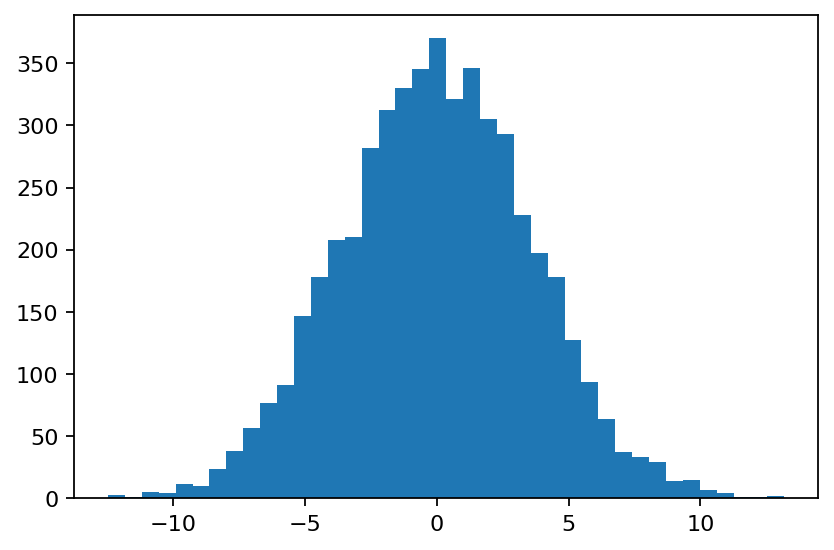

In [30]:
import numpy as np
rng=np.random.default_rng()
import subprocess

from multiprocessing import Pool
n=50
k=100
a=1
b=1
niter=5000
xs=a*np.ones(n)
ys=b*np.ones(k)

c=k/n

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def getxs(i):
    return np.array([len(a)+n-1-i for (i,a) in enumerate(dual_rsk_with_weights(xs,ys,seeds[i])[1])])

with Pool() as p:
    data=p.map(getxs,range(niter))

def f(x):
    return (x+1)**2

st2=np.array([np.sum(f(x/n)) for x in data])


import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 160
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['patch.linewidth'] = 1/n

plt.hist(st2-st2.mean(),bins=40)
#binwidth=1
#plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)

In [31]:
a=np.sqrt(c)/2
b=(c+1)/2
xx=2*np.pi*np.arange(1000)/1000
np.sum(
    [l*np.abs(np.sum(f(2*a*np.cos(xx)+b)*np.exp(-1j*l*xx)*1/1000))**2 for l in range(1,30)])

12.999999999999995

In [32]:
st2.std()**2

12.925909162668287